<a href="https://colab.research.google.com/github/Prashant884-hub/Machine-learning-models/blob/main/Crop_Prediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv("Crop_recommendation.csv")

In [3]:
print(df.head())
print(df.info())
print(df.isnull().sum())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
N        

In [4]:
X = df.drop("label", axis=1)
y = df["label"]

In [5]:
le = LabelEncoder()
y_enc = le.fit_transform(y)
y_cat = to_categorical(y_enc)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_cat, test_size=0.2, random_state=42, stratify=y_enc
)

In [8]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_cat.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=2
)

Epoch 1/100
44/44 - 4s - 81ms/step - accuracy: 0.0824 - loss: 3.0905 - val_accuracy: 0.2273 - val_loss: 2.8835
Epoch 2/100
44/44 - 0s - 4ms/step - accuracy: 0.2351 - loss: 2.7669 - val_accuracy: 0.3352 - val_loss: 2.5072
Epoch 3/100
44/44 - 0s - 4ms/step - accuracy: 0.3658 - loss: 2.3550 - val_accuracy: 0.5142 - val_loss: 1.9827
Epoch 4/100
44/44 - 0s - 4ms/step - accuracy: 0.4837 - loss: 1.8575 - val_accuracy: 0.6307 - val_loss: 1.4381
Epoch 5/100
44/44 - 0s - 4ms/step - accuracy: 0.5710 - loss: 1.4614 - val_accuracy: 0.7159 - val_loss: 1.0508
Epoch 6/100
44/44 - 0s - 4ms/step - accuracy: 0.6044 - loss: 1.2127 - val_accuracy: 0.8210 - val_loss: 0.8031
Epoch 7/100
44/44 - 0s - 4ms/step - accuracy: 0.6499 - loss: 1.0690 - val_accuracy: 0.8210 - val_loss: 0.6709
Epoch 8/100
44/44 - 0s - 4ms/step - accuracy: 0.6818 - loss: 0.9402 - val_accuracy: 0.8835 - val_loss: 0.5676
Epoch 9/100
44/44 - 0s - 4ms/step - accuracy: 0.7124 - loss: 0.8485 - val_accuracy: 0.8892 - val_loss: 0.4884
Epoch 10/

In [10]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")

Test Loss: 0.0572, Test Accuracy: 0.9795


In [11]:
def predict_crop_nn(input_features_array):

    x = scaler.transform(np.array([input_features_array]))
    preds = model.predict(x)
    class_index = np.argmax(preds, axis=1)[0]
    return le.inverse_transform([class_index])[0]

In [12]:
sample = [25, 70, 230, 50, 42, 38, 6.5]
print("Predicted crop:", predict_crop_nn(sample))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Predicted crop: mothbeans


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Final Model Accuracy: 0.9795454545454545

Classification Report:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.90      0.90      0.90        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.95      1.00      0.98        20
       maize       1.00      0.95      0.97        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       0.91     

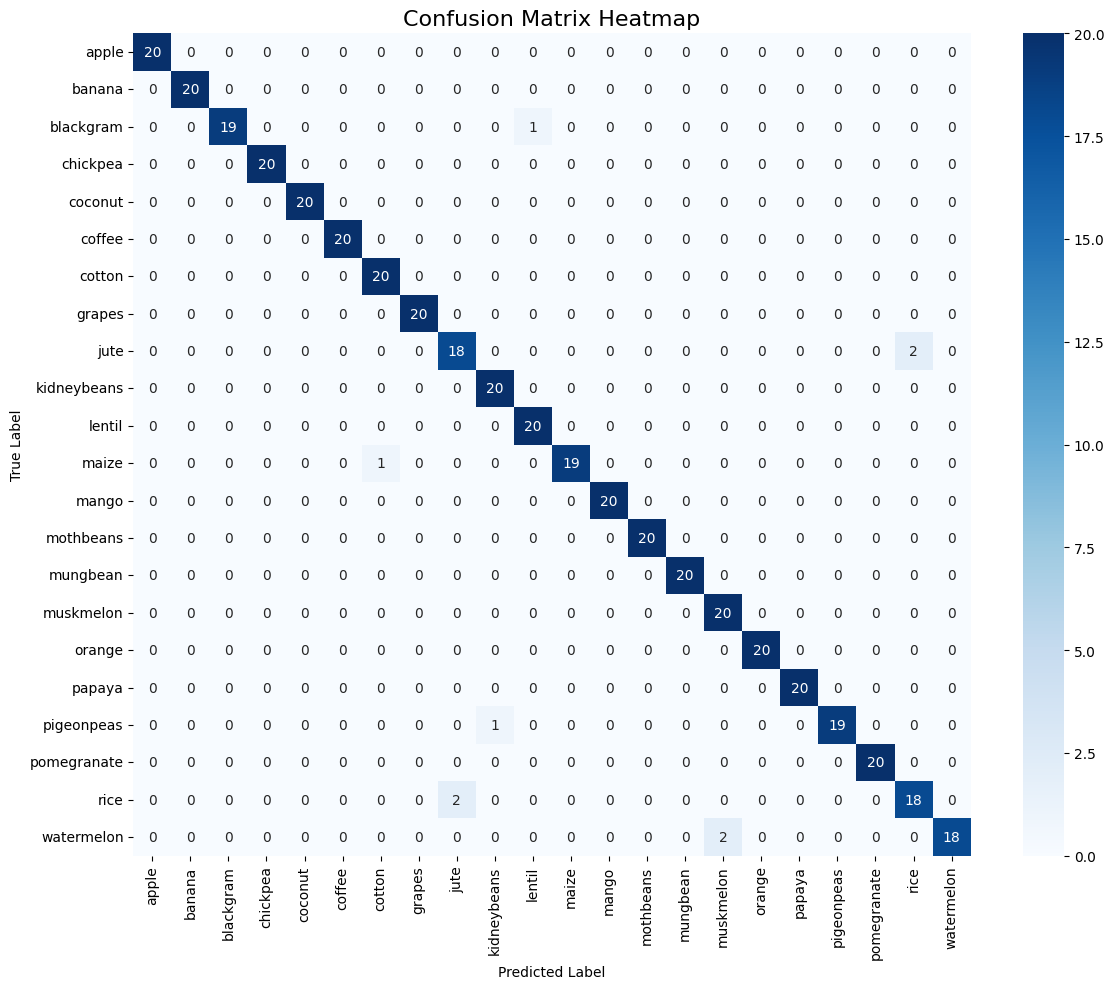

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Convert one-hot test labels back to normal labels
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(model.predict(X_test), axis=1)

# Accuracy
acc = accuracy_score(y_test_labels, y_pred_labels)
print("\nFinal Model Accuracy:", acc)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test_labels, y_pred_labels, target_names=le.classes_))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix Heatmap", fontsize=16)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
